In [1]:
import pandas
import pycaret.classification as classification

In [2]:
train_df = pandas.read_csv("train.csv")

In [3]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
train_df_without_id = train_df.drop(columns=["id"])
train_df_without_id

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
classification.setup(train_df_without_id, target="target")

,Description,Value
0,Session id,3454
1,Target,target
2,Target type,Binary
3,Original data shape,"(7613, 4)"
4,Transformed data shape,"(7613, 4)"
5,Transformed train set shape,"(5329, 4)"
6,Transformed test set shape,"(2284, 4)"
7,Categorical features,3
8,Rows with missing values,33.3%
9,Preprocess,True


In [6]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7075,0.7736,0.4913,0.7414,0.5902,0.3772,0.3969,0.4800
ada,Ada Boost Classifier,0.6596,0.6303,0.5100,0.6383,0.5609,0.2896,0.2982,0.0370
rf,Random Forest Classifier,0.6570,0.6716,0.3830,0.6772,0.4869,0.2599,0.2839,0.0650
gbc,Gradient Boosting Classifier,0.6480,0.6599,0.4738,0.6488,0.5343,0.2636,0.2773,0.0450
et,Extra Trees Classifier,0.6480,0.6512,0.3594,0.6676,0.4626,0.2376,0.2638,0.0560
lightgbm,Light Gradient Boosting Machine,0.6468,0.6485,0.4148,0.6362,0.4956,0.2463,0.2607,0.0690
knn,K Neighbors Classifier,0.6393,0.5920,0.2354,0.7551,0.3567,0.1954,0.2589,0.2460
dt,Decision Tree Classifier,0.6339,0.6469,0.3638,0.6215,0.4523,0.2107,0.2278,0.0180
svm,SVM - Linear Kernel,0.5825,0.7288,0.1996,0.7352,0.1898,0.0729,0.1201,0.0180
ridge,Ridge Classifier,0.5812,0.7538,0.0323,0.8216,0.0621,0.0307,0.1034,0.0180


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='deprecated', n_jobs=None, penalty='l2',
                   random_state=3454, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
my_model = classification.create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6961,0.7476,0.5022,0.7055,0.5867,0.3570,0.3699
1,0.7205,0.7939,0.4934,0.7740,0.6027,0.4029,0.4272
2,0.6604,0.7358,0.4105,0.6714,0.5095,0.2722,0.2915
3,0.7280,0.7879,0.5415,0.7561,0.6310,0.4248,0.4396
4,0.6904,0.7545,0.4672,0.7133,0.5646,0.3403,0.3586
5,0.6829,0.7578,0.4629,0.6974,0.5564,0.3250,0.3416
6,0.7317,0.7876,0.4803,0.8209,0.6061,0.4231,0.4580
7,0.7167,0.7945,0.4978,0.7600,0.6016,0.3963,0.4176
8,0.7261,0.7952,0.5590,0.7399,0.6368,0.4237,0.4345


In [8]:
tuned_model = classification.tune_model(my_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6923,0.7434,0.5066,0.6946,0.5859,0.3505,0.3616
1,0.7186,0.7888,0.5066,0.7582,0.6073,0.4013,0.4211
2,0.6548,0.7320,0.4192,0.6531,0.5106,0.2631,0.2785
3,0.7280,0.7847,0.5590,0.7442,0.6384,0.4273,0.4386
4,0.6942,0.7504,0.4760,0.7171,0.5722,0.3490,0.3668
5,0.6792,0.7520,0.4672,0.6859,0.5558,0.3186,0.3330
6,0.7317,0.7842,0.4978,0.8028,0.6146,0.4257,0.4543
7,0.7054,0.7892,0.4934,0.7338,0.5901,0.3737,0.3916
8,0.7223,0.7912,0.5546,0.7341,0.6318,0.4158,0.4264


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


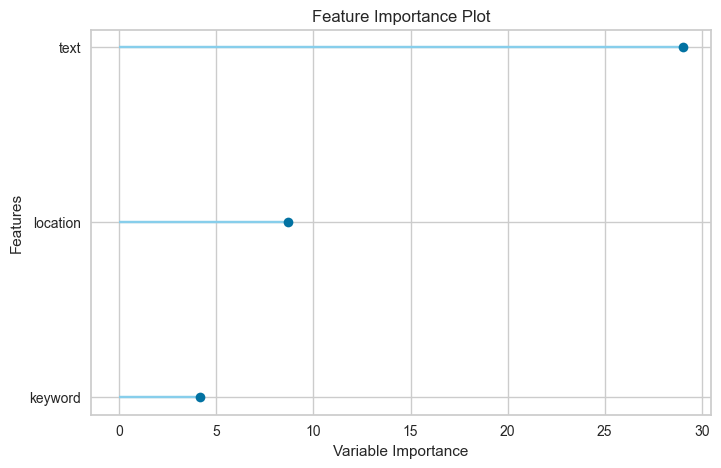

In [9]:
classification.plot_model(tuned_model, plot="feature")

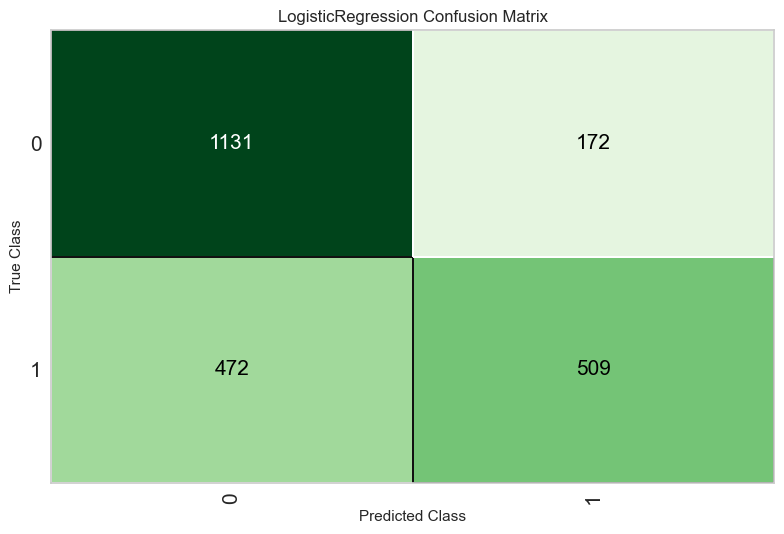

In [10]:
classification.plot_model(tuned_model, plot="confusion_matrix")

In [11]:
final_model =classification.finalize_model(tuned_model)

In [12]:
test_df = pandas.read_csv("test.csv")

In [13]:
predict_df = classification.predict_model(final_model, test_df)
predict_df

,id,keyword,location,text,prediction_label,prediction_score
0,0,NaN,NaN,Just happened a terrible car crash,1,0.5399
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1,0.5399
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1,0.5399
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1,0.5399
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1,0.5399
...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1,0.5399
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1,0.9321
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1,0.5399
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1,0.9321


In [14]:
submit_df = predict_df[["id", "prediction_label"]]
submit_df.columns = ["id", "target"]
submit_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [15]:
submit_df.to_csv("submit.csv", index=False)